In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [ ]:
# print(test_new.head())

In [7]:
# multivariate_column_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
#                            'RWWIHOA_MWT0','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
univariate_column_label=['AEDAHO_T9_V2']

multivariate_column_label=['AEDATZ_HO_V0', 'AEWIHO_T9AV2','AEDAHO_T9_V2']
multivariate_data=test_new.iloc[2000:8000][multivariate_column_label] #just for checking whether it is working or not

In [8]:
multivariate_data=multivariate_data.loc[::-1]

In [9]:
print(multivariate_data.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-04-10 10:27:00     47.940286     70.749025     60.423638
2019-04-10 10:28:00     49.995617     71.342960     65.349113
2019-04-10 10:29:00     50.418591     72.862086     68.233293
2019-04-10 10:30:00     50.347512     79.197810     67.651555
2019-04-10 10:31:00     48.911624     81.382283     64.434328


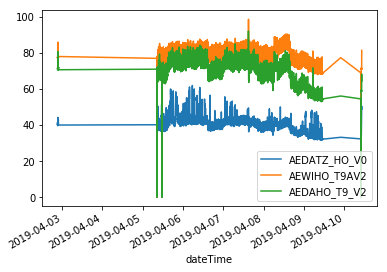

In [10]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [11]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)

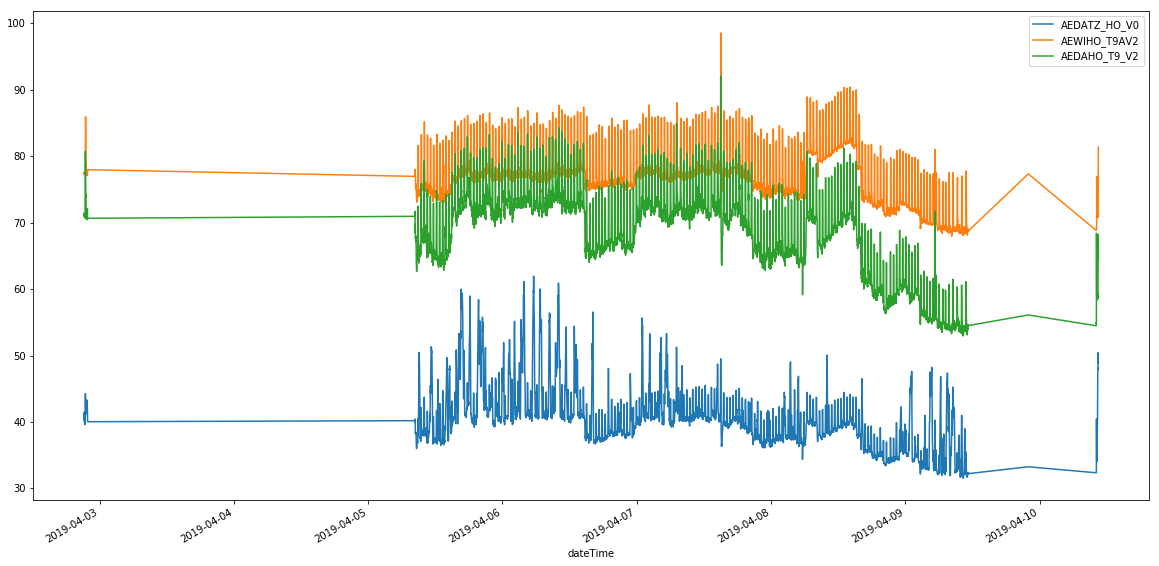

In [12]:
multivariate_data_mean.plot()
plt.show()

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [14]:
print(df_normalized.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-04-10 10:27:00      0.538983      0.091576      0.191062
2019-04-10 10:28:00      0.606631      0.110981      0.316978
2019-04-10 10:29:00      0.620552      0.160613      0.390710
2019-04-10 10:30:00      0.618213      0.367610      0.375838
2019-04-10 10:31:00      0.570953      0.438980      0.293592


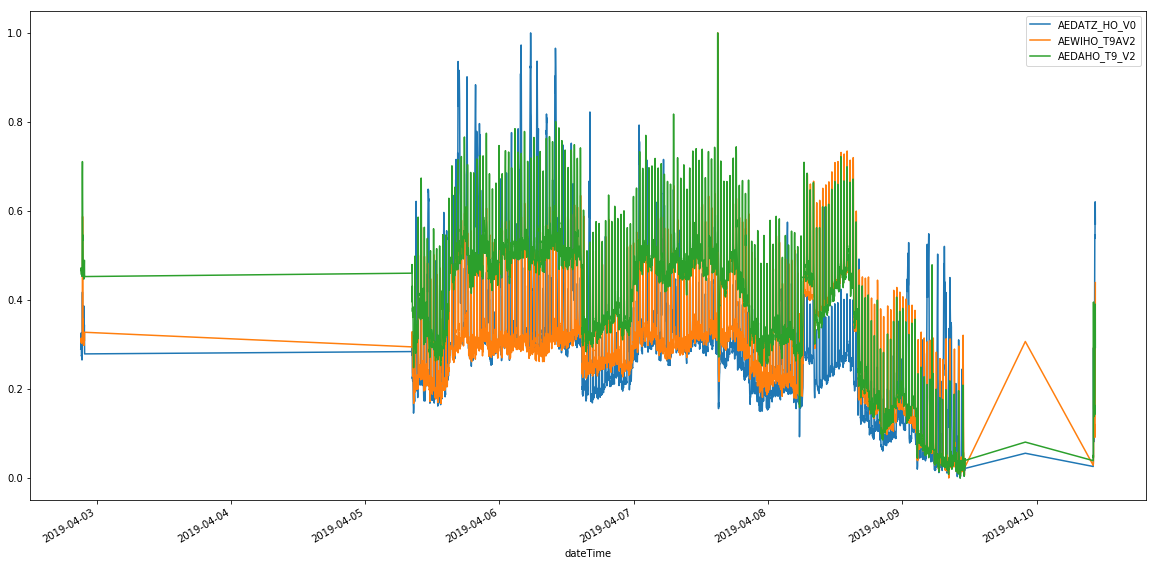

In [15]:
df_normalized.plot()
plt.show()

In [16]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(df_normalized)

NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  6000
Number of Elements for training:  5400
(5400, 3)
(600, 3)


In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [18]:
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_1
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [19]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm, Y_op_cnn_lstm = split_sequence(multiple_ip_train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

In [20]:
print('X_ip_cnn_lstm shape: ',X_ip_cnn_lstm.shape,'\tX_ip_cnn_lstm size: ',X_ip_cnn_lstm.size,'\tX_ip_cnn_lstm dimension: ',X_ip_cnn_lstm.ndim)
print('Y_op_cnn_lstm shape: ',Y_op_cnn_lstm.shape,'\tY_op_cnn_lstm size: ',Y_op_cnn_lstm.size,'\tY_op_cnn_lstm dimension: ',Y_op_cnn_lstm.ndim)

X_ip_cnn_lstm shape:  (5396, 4, 2) 	X_ip_cnn_lstm size:  43168 	X_ip_cnn_lstm dimension:  3
Y_op_cnn_lstm shape:  (5396,) 	Y_op_cnn_lstm size:  5396 	Y_op_cnn_lstm dimension:  1


In [21]:
n_features = X_ip_cnn_lstm.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm = X_ip_cnn_lstm.reshape((X_ip_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))

In [22]:
print('train_ip_cnn_lstm shape: ',train_ip_cnn_lstm.shape,'\ttrain_ip_cnn_lstm size: ',
      train_ip_cnn_lstm.size,'\ttrain_ip_cnn_lstm dimension: ',train_ip_cnn_lstm.ndim)

train_ip_cnn_lstm shape:  (5396, 2, 2, 2) 	train_ip_cnn_lstm size:  43168 	train_ip_cnn_lstm dimension:  4


#  without using validation split you cannot save the best model. Then you can use False instead of True in the return of save_best_only argument

In [23]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=3

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/cnn_LSTM_norm_30.h5',
                                     save_best_only=True)])

Epoch 1/3
5396/5396 [==============================] - 2s 455us/step - loss: 0.0135 - acc: 1.8532e-04
Epoch 2/3
 704/5396 [==>...........................] - ETA: 1s - loss: 0.0083 - acc: 0.0014    

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


5396/5396 [==============================] - 1s 100us/step - loss: 0.0057 - acc: 1.8532e-04
Epoch 3/3
5396/5396 [==============================] - 1s 96us/step - loss: 0.0045 - acc: 1.8532e-04


In [ ]:
X_CNN_Lstm_test, y_CNN_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)

x_input = X_CNN_Lstm_test.reshape((X_CNN_Lstm_test.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test.shape[-1]))

In [ ]:
print(x_input.shape)

In [ ]:
# from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5')

yhat = cnn_lstm.predict(x_input, verbose=1)
# print(yhat)

In [ ]:
# print(y_CNN_Lstm_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

In [ ]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='green')
plt.plot(y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'y_CNN_Lstm_test'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Unnormalize data to test

In [ ]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [ ]:
max_array

In [ ]:
target_column_max_value=max_array[-1][-1]

In [ ]:
target_column_max_value

In [ ]:
unnormalized_yhat=yhat*target_column_max_value
unnormalized_y_CNN_Lstm_test=y_CNN_Lstm_test*target_column_max_value

In [ ]:
print(unnormalized_yhat.shape)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_yhat,color='green')
plt.plot(unnormalized_y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_CNN_Lstm'], loc='upper left')
plt.show()

In [ ]:
def do_reshape(ready_ip_1):
    global n_seq,n_steps_2
    x_input = ready_ip_1.reshape((ready_ip_1.shape[0], n_seq, n_steps_2, ready_ip_1.shape[-1]))
    return x_input

def make_test_set(start,end,multivariate_column_label):
    global test_new
    test_dataset=test_new.iloc[start:end][multivariate_column_label]
    test_dataset=test_dataset.loc[::-1]
    mean_value=test_dataset.mean()
    test_dataset_mean= test_dataset.replace(0,mean_value)
    global min_max_scaler
    np_scaled_1 = min_max_scaler.fit_transform(test_dataset_mean)
    df_normalized_1 = pd.DataFrame(np_scaled_1,columns=multivariate_column_label)
    df_normalized_2=np.array(df_normalized_1)
    ready_ip,ready_op=split_sequence(df_normalized_2,n_steps_1)
    reshaped_input=do_reshape(ready_ip)
    
    return test_dataset_mean,reshaped_input,ready_op


mean_data,reshaped_ip,real_op=make_test_set(18000,20000,multivariate_column_label)

# my_data_array=np.array(norm_data)
# ready_ip,ready_op=split_sequence(my_data_array,n_steps_1)

# reshaped_input=do_reshape(ready_ip)

In [ ]:
mean_data.head()

In [ ]:
print(reshaped_input.shape)

In [ ]:
maximum_val=real_op.max()
print(maximum_val)
yhat_new=cnn_lstm.predict(reshaped_input, verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(real_op,yhat_new)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(real_op,yhat_new)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(yhat_new,color='green')
plt.plot(real_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()

In [ ]:
# finding max value from each column
max_array_1=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=mean_data[val].max()
    q=[val,x]
    max_array_1.append(q)

In [ ]:
max_array_1

In [ ]:
target_max=max_array_1[-1][-1]

In [ ]:
unnormalized_prdicted=yhat_new*target_max
unnormalized_actual_op=real_op*target_max

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_actual_op,unnormalized_prdicted)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_actual_op,unnormalized_prdicted)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_prdicted,color='green')
plt.plot(unnormalized_actual_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()